#DECLARING A VARIABLE AND LISTING THE CONTENTS OF THE FILESTORE

In [0]:
#THE DATA WAS UPLOADED TO FILESTORE TABLES USING THE DATA IMPORT TAB
#TO MAKE IT RERUNNABLE A VARIABLE WAS DECLARED TO HOLD THE FILE
filepath = 'clinicaltrial_2021'

In [0]:
#VIEIWNG THE TABLES IN DFBS TO ENSURE THE DATASET IS IN PLACE
dbutils.fs.ls('FileStore/tables/')

Out[2]: [FileInfo(path='dbfs:/FileStore/tables/FaultDataset.csv', name='FaultDataset.csv', size=1703184, modificationTime=1678732949000),
 FileInfo(path='dbfs:/FileStore/tables/Occupancy_Detection_Data.csv', name='Occupancy_Detection_Data.csv', size=50968, modificationTime=1677674655000),
 FileInfo(path='dbfs:/FileStore/tables/TS021_2021_2.csv', name='TS021_2021_2.csv', size=497239, modificationTime=1679496723000),
 FileInfo(path='dbfs:/FileStore/tables/account-models/', name='account-models/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts/', name='accounts/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts-1.zip', name='accounts-1.zip', size=5297592, modificationTime=1676237470000),
 FileInfo(path='dbfs:/FileStore/tables/accounts.zip', name='accounts.zip', size=5297592, modificationTime=1675260078000),
 FileInfo(path='dbfs:/FileStore/tables/activations/', name='activations/', size=0, modificationTime=0),
 FileInfo(path='dbfs:

In [0]:
#COPYING THE FILE FROM DFBS TO A TEMPORAL FOLDER DIRECTORY TO ENABLE UNZIPPING
#dbutils toolkit doesn't provide an unzip command,the file was copied to the driver node
dbutils.fs.cp("/FileStore/tables/" + filepath + '.zip', "file:/tmp/")

Out[3]: True

In [0]:

%sh
ls /tmp/

Rserv
RtmpMuluiR
chauffeur-daemon-params
chauffeur-daemon.pid
chauffeur-env.sh
clinicaltrial_2021.zip
custom-spark.conf
driver-daemon-params
driver-daemon.pid
driver-env.sh
hsperfdata_root
pharma.zip
systemd-private-3fb9da1b077044d18a40b2b027a88e50-apache2.service-0TJRwf
systemd-private-3fb9da1b077044d18a40b2b027a88e50-ntp.service-XQzJzh
systemd-private-3fb9da1b077044d18a40b2b027a88e50-systemd-logind.service-lfW7Ue
systemd-private-3fb9da1b077044d18a40b2b027a88e50-systemd-resolved.service-vqDDyf
tmp.16odpNvmHe


In [0]:
# Local filesystem/shell command line doesn’t know the “filepath” variable OS was imported to make it accessible uisng the command line.
import os
os.environ['filepath'] = filepath

Using the UNIX command unzip to extract the contents

In [0]:

%sh
unzip -d /tmp/ /tmp/$filepath

Archive:  /tmp/clinicaltrial_2021.zip
  inflating: /tmp/clinicaltrial_2021.csv  


In [0]:
#CREATING A FOLDER IN THE DIRECTORY TO HOLD THE UNZIPPED FILE
dbutils.fs.mkdirs("FileStore/tables/clinical")

Out[7]: True

In [0]:
#MOVING THE UNZIPPED FILE FROM DRIVER NODE/TMP TO THE CREATED FOLDER IN THE DBFS FILESTORE
dbutils.fs.mv("file:/tmp/" + filepath + '.csv', "/FileStore/tables/clinical", True)

Out[8]: True

In [0]:
#VIEWING THE FOLDER AFTER MOVVING THE FILE
dbutils.fs.ls("FileStore/tables/clinical/")

Out[9]: [FileInfo(path='dbfs:/FileStore/tables/clinical/clinicaltrial_2019.csv', name='clinicaltrial_2019.csv', size=42400056, modificationTime=1679134326000),
 FileInfo(path='dbfs:/FileStore/tables/clinical/clinicaltrial_2019.zip', name='clinicaltrial_2019.zip', size=9707871, modificationTime=1678303258000),
 FileInfo(path='dbfs:/FileStore/tables/clinical/clinicaltrial_2020.csv', name='clinicaltrial_2020.csv', size=46318151, modificationTime=1679352935000),
 FileInfo(path='dbfs:/FileStore/tables/clinical/clinicaltrial_2021.csv', name='clinicaltrial_2021.csv', size=50359696, modificationTime=1681122206000)]

In [0]:
#DATASET/FILE EXPLORATION TO HAVE AN INSIGHT ON THE STRUCTURE AND SCHEMA
dbutils.fs.head("FileStore/tables/clinical/" + filepath + '.csv')

[Truncated to first 65536 bytes]
Out[10]: "Id|Sponsor|Status|Start|Completion|Type|Submission|Conditions|Interventions\r\nNCT02758028|The University of Hong Kong|Recruiting|Aug 2005|Nov 2021|Interventional|Apr 2016||\r\nNCT02751957|Duke University|Completed|Jul 2016|Jul 2020|Interventional|Apr 2016|Autistic Disorder,Autism Spectrum Disorder|\r\nNCT02758483|Universidade Federal do Rio de Janeiro|Completed|Mar 2017|Jan 2018|Interventional|Apr 2016|Diabetes Mellitus|\r\nNCT02759848|Istanbul Medeniyet University|Completed|Jan 2012|Dec 2014|Observational|May 2016|Tuberculosis,Lung Diseases,Pulmonary Disease|\r\nNCT02758860|University of Roma La Sapienza|Active, not recruiting|Jun 2016|Sep 2020|Observational [Patient Registry]|Apr 2016|Diverticular Diseases,Diverticulum,Diverticulosis|\r\nNCT02757209|Consorzio Futuro in Ricerca|Completed|Apr 2016|Jan 2018|Interventional|Apr 2016|Asthma|Fluticasone,Xhance,Budesonide,Formoterol Fumarate,Salmeterol Xinafoate\r\nNCT02752438|Ankara University|Unk

#NUMBER OF STUDIES : QUESTION ONE PROCEDURE AND ANSWER

In [0]:
#QUESTION 1
#converting to a textfile
myrdd1 = sc.textFile("FileStore/tables/clinical/" + filepath + '.csv')

                   

In [0]:
#extracting header
header = myrdd1.first() 
myrdd2 = myrdd1.filter(lambda row: row != header)

In [0]:
myrdd2.take(10)

Out[13]: ['NCT02758028|The University of Hong Kong|Recruiting|Aug 2005|Nov 2021|Interventional|Apr 2016||',
 'NCT02751957|Duke University|Completed|Jul 2016|Jul 2020|Interventional|Apr 2016|Autistic Disorder,Autism Spectrum Disorder|',
 'NCT02758483|Universidade Federal do Rio de Janeiro|Completed|Mar 2017|Jan 2018|Interventional|Apr 2016|Diabetes Mellitus|',
 'NCT02759848|Istanbul Medeniyet University|Completed|Jan 2012|Dec 2014|Observational|May 2016|Tuberculosis,Lung Diseases,Pulmonary Disease|',
 'NCT02758860|University of Roma La Sapienza|Active, not recruiting|Jun 2016|Sep 2020|Observational [Patient Registry]|Apr 2016|Diverticular Diseases,Diverticulum,Diverticulosis|',
 'NCT02757209|Consorzio Futuro in Ricerca|Completed|Apr 2016|Jan 2018|Interventional|Apr 2016|Asthma|Fluticasone,Xhance,Budesonide,Formoterol Fumarate,Salmeterol Xinafoate',
 'NCT02752438|Ankara University|Unknown status|May 2016|Jul 2017|Observational [Patient Registry]|Apr 2016|Hypoventilation|',
 'NCT02753543|

In [0]:
#THE COUNT OF STUDIES
myrdd2.count()

Out[14]: 387261

#TYPES OF STUDIES AND FREQUENCY: QUESTION TWO PROCEDURE AND ANSWER

In [0]:
#QUESTION 2
#splitting the column type using the index
ft_myrdd2 = myrdd2.map(lambda s:(s.split("|")[5] , 1))
ft_myrdd2.take(10)

Out[15]: [('Interventional', 1),
 ('Interventional', 1),
 ('Interventional', 1),
 ('Observational', 1),
 ('Observational [Patient Registry]', 1),
 ('Interventional', 1),
 ('Observational [Patient Registry]', 1),
 ('Interventional', 1),
 ('Interventional', 1),
 ('Interventional', 1)]

In [0]:
#using reduceby to get the frequency of each case type and sortby
ft_myrdd3 = ft_myrdd2.reduceByKey(lambda a,b: a + b)
ft_myrdd3 = ft_myrdd3.sortBy(lambda x: x[1], False)
ft_myrdd3.take(10)

Out[16]: [('Interventional', 301472),
 ('Observational', 77540),
 ('Observational [Patient Registry]', 8180),
 ('Expanded Access', 69)]

In [0]:
#pairing the conditions and frequency
ft_myrdd4 = ft_myrdd3.map(lambda pair :(pair[1] , pair[0]))
ft_myrdd4.take(10)

Out[17]: [(301472, 'Interventional'),
 (77540, 'Observational'),
 (8180, 'Observational [Patient Registry]'),
 (69, 'Expanded Access')]

#TOP 5 CONDITIONS: QUESTION THREE PROCEDURE AND ANSWER

In [0]:
#QUESTION 3
#To generate the five top conditions with thier frequency
myrdd2 = myrdd1.map(lambda s:(s.split("|")[7] , 1))
myrdd2.take(10)

Out[18]: [('Conditions', 1),
 ('', 1),
 ('Autistic Disorder,Autism Spectrum Disorder', 1),
 ('Diabetes Mellitus', 1),
 ('Tuberculosis,Lung Diseases,Pulmonary Disease', 1),
 ('Diverticular Diseases,Diverticulum,Diverticulosis', 1),
 ('Asthma', 1),
 ('Hypoventilation', 1),
 ('Lymphoma', 1),
 ('', 1)]

In [0]:
#Filtering the empty string out
fil_myrdd2 = myrdd2.filter(lambda x: x[0].split(' ')[0] > '0')
fil_myrdd2.take(10)


Out[19]: [('Conditions', 1),
 ('Autistic Disorder,Autism Spectrum Disorder', 1),
 ('Diabetes Mellitus', 1),
 ('Tuberculosis,Lung Diseases,Pulmonary Disease', 1),
 ('Diverticular Diseases,Diverticulum,Diverticulosis', 1),
 ('Asthma', 1),
 ('Hypoventilation', 1),
 ('Lymphoma', 1),
 ('Myositis', 1),
 ('Diabetes Mellitus', 1)]

In [0]:
# Split each line by comma into a tuple of key-value pairs
split_rdd = fil_myrdd2.flatMap(lambda arr: [(s,1) for s in arr[0].split(",")])


split_rdd.take(10)


Out[20]: [('Conditions', 1),
 ('Autistic Disorder', 1),
 ('Autism Spectrum Disorder', 1),
 ('Diabetes Mellitus', 1),
 ('Tuberculosis', 1),
 ('Lung Diseases', 1),
 ('Pulmonary Disease', 1),
 ('Diverticular Diseases', 1),
 ('Diverticulum', 1),
 ('Diverticulosis', 1)]

In [0]:
#ANSWER
# Apply reduceByKey on the new RDD
#After concluding the map transformation, we can use reduce transformation
reduced_myrdd2 = split_rdd.reduceByKey(lambda a,b: a + b)
ordered_rdd = reduced_myrdd2.sortBy(lambda x: x[1],False)
ordered_rdd.take(5)

Out[21]: [('Carcinoma', 13389),
 ('Diabetes Mellitus', 11080),
 ('Neoplasms', 9371),
 ('Breast Neoplasms', 8640),
 ('Syndrome', 8032)]

In [0]:
#pairing the conditions and frequency
myrdd4 = ordered_rdd.map(lambda pair :(pair[1] , pair[0]))
myrdd4.take(5)

Out[22]: [(13389, 'Carcinoma'),
 (11080, 'Diabetes Mellitus'),
 (9371, 'Neoplasms'),
 (8640, 'Breast Neoplasms'),
 (8032, 'Syndrome')]

#TOP 10 COMMON SPONSORS: QUESTION FOUR PROCEDURE AND ANSWER

In [0]:
#QUESTION 4
#creating a variable and copying the file from DBFS to a tmp directory
filepath1 = "pharma"
dbutils.fs.cp("/FileStore/tables/" + filepath1 + ".zip", "file:/tmp/")


Out[23]: True

In [0]:
#Making the variable accessible
import os
os.environ['filepath1'] = filepath1

In [0]:

%sh
unzip -d /tmp /tmp/$filepath1


Archive:  /tmp/pharma.zip
  inflating: /tmp/pharma.csv         


In [0]:
#creating a directory in the DBFS and copying the unziped files from tmp to DBFS folder
#dbutils.fs.rm("/FileStore/tables/" + filepath1, True)
dbutils.fs.mkdirs("/FileStore/tables/pharma")


Out[26]: True

In [0]:
#dbutils.fs.rm("/FileStore/tables/" + filepath1 + ".zip")

dbutils.fs.mv("file:/tmp/" + filepath1 + ".csv" , "/FileStore/tables/pharma" , True)


Out[27]: True

In [0]:
#checking the structure of the file
dbutils.fs.head("FileStore/tables/pharma/" + filepath1 + '.csv')

[Truncated to first 65536 bytes]
Out[28]: '"Company","Parent_Company","Penalty_Amount","Subtraction_From_Penalty","Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting","Penalty_Year","Penalty_Date","Offense_Group","Primary_Offense","Secondary_Offense","Description","Level_of_Government","Action_Type","Agency","Civil/Criminal","Prosecution_Agreement","Court","Case_ID","Private_Litigation_Case_Title","Lawsuit_Resolution","Facility_State","City","Address","Zip","NAICS_Code","NAICS_Translation","HQ_Country_of_Parent","HQ_State_of_Parent","Ownership_Structure","Parent_Company_Stock_Ticker","Major_Industry_of_Parent","Specific_Industry_of_Parent","Info_Source","Notes"\n"Abbott Laboratories","Abbott Laboratories","$5,475,000","$0","$5,475,000","2013","20131227","government-contracting-related offenses","False Claims Act and related","kickbacks and bribery","Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to in

In [0]:
#CONVERTING THE FILE INTO A TEXTFILE FOR THE ANALYSIS
ph_myrdd1 = sc.textFile("FileStore/tables/pharma/" + filepath1 + '.csv')

In [0]:
#extract header
header = ph_myrdd1.first()
phm_myrdd1 = ph_myrdd1.filter(lambda row: row != header)
phm_myrdd1.take(10)

Out[30]: ['"Abbott Laboratories","Abbott Laboratories","$5,475,000","$0","$5,475,000","2013","20131227","government-contracting-related offenses","False Claims Act and related","kickbacks and bribery","Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the company\'s carotid, biliary and peripheral vascular products.","federal","agency action","Justice Department Civil Division","civil","","","","","","","","","","","","USA","Illinois","publicly traded","ABT","pharmaceuticals","pharmaceuticals","https://www.justice.gov/opa/pr/abbott-laboratories-pays-us-5475-million-settle-claims-company-paid-kickbacks-physicians",""',
 '"Abbott Laboratories Inc.","AbbVie","$1,500,000,000","$0","$1,500,000,000","2012","20120507","healthcare-related offenses","off-label or unapproved promotion of medical products","","Global Health Care Company Abbott Laboratories Inc. has pleaded guilty and agreed to

In [0]:
phm_myrdd1.count()

Out[31]: 968

In [0]:
#SPLITTING THE COLLUMN USING THE INDEX
phm_myrdd2 = phm_myrdd1.map(lambda s: s.replace('"','')).map(lambda s:s.split(',')[1])
phm_myrdd3 = phm_myrdd2.filter(lambda x: x[0].split(",")[0] > '0')
phm_myrdd3.take(10)

Out[32]: ['Abbott Laboratories',
 'AbbVie',
 'AbbVie',
 'Johnson & Johnson',
 'Abbott Laboratories',
 'Johnson & Johnson',
 'Abbott Laboratories',
 'AbbVie',
 'AbbVie',
 'Pfizer']

In [0]:
#Further splitting of PARENT COMPANY column
phm_myrdd4 = phm_myrdd3.map(lambda x:(x.split(",")[0],1))
phm_myrdd4.take(10)

Out[33]: [('Abbott Laboratories', 1),
 ('AbbVie', 1),
 ('AbbVie', 1),
 ('Johnson & Johnson', 1),
 ('Abbott Laboratories', 1),
 ('Johnson & Johnson', 1),
 ('Abbott Laboratories', 1),
 ('AbbVie', 1),
 ('AbbVie', 1),
 ('Pfizer', 1)]

In [0]:
#Applying reduceBykey on the spliited rdd and sorting with the most frequent
reduced_phm_myrdd4 = phm_myrdd4.reduceByKey(lambda a,b: a + b)
phm_myrdd5 =reduced_phm_myrdd4.sortBy(lambda x: x[1],False)
phm_myrdd5.take(10)

Out[34]: [('Merck', 64),
 ('Pfizer', 52),
 ('Johnson & Johnson', 39),
 ('AbbVie', 38),
 ('Teva Pharmaceutical Industries', 36),
 ('Bristol-Myers Squibb', 36),
 ('Novartis', 34),
 ('GlaxoSmithKline', 31),
 ('Viatris', 31),
 ('Merck KGaA (EMD)', 29)]

#EXTRACTING SPONSORS COLUMN FROM MAIN RDD

In [0]:
#EXTRACTING SPONSORS COLUMN FROM MAIN RDD
spn_myrdd = myrdd1.map(lambda s:(s.split("|")[1],1))
spn_myrdd.take(10)

Out[35]: [('Sponsor', 1),
 ('The University of Hong Kong', 1),
 ('Duke University', 1),
 ('Universidade Federal do Rio de Janeiro', 1),
 ('Istanbul Medeniyet University', 1),
 ('University of Roma La Sapienza', 1),
 ('Consorzio Futuro in Ricerca', 1),
 ('Ankara University', 1),
 ('Ruijin Hospital', 1),
 ('Washington University School of Medicine', 1)]

In [0]:
#FILTERING THE HEADER OUT
header = spn_myrdd.first() #extract header
spn_myrdd1 = spn_myrdd.filter(lambda row: row != header)
spn_myrdd1.take(10)

Out[36]: [('The University of Hong Kong', 1),
 ('Duke University', 1),
 ('Universidade Federal do Rio de Janeiro', 1),
 ('Istanbul Medeniyet University', 1),
 ('University of Roma La Sapienza', 1),
 ('Consorzio Futuro in Ricerca', 1),
 ('Ankara University', 1),
 ('Ruijin Hospital', 1),
 ('Washington University School of Medicine', 1),
 ('Orphazyme', 1)]

In [0]:
#After concluding the map transformation, I used reducebykey transformation on the sponsor column to aggregate
reduced_spn_myrdd1 = spn_myrdd1.reduceByKey(lambda a,b: a + b)
spn_myrdd2 = reduced_spn_myrdd1.sortBy(lambda x: x[1],False)
spn_myrdd2.take(10)

Out[37]: [('GlaxoSmithKline', 3378),
 ('National Cancer Institute (NCI)', 3218),
 ('AstraZeneca', 2691),
 ('Pfizer', 2645),
 ('M.D. Anderson Cancer Center', 2414),
 ('Assistance Publique - Hôpitaux de Paris', 2369),
 ('Mayo Clinic', 2300),
 ('Merck Sharp & Dohme Corp.', 2243),
 ('Assiut University', 2154),
 ('Novartis Pharmaceuticals', 2088)]

#ANSWER TO Q4

In [0]:
#Question 4 Answer 10 most common non-pharmaceutical companies
npc_myrdd = phm_myrdd5.keys().collect()
npc_myrdd1 = spn_myrdd2.filter(lambda x : x[0] not in npc_myrdd)
npc_myrdd1.take(10)

Out[38]: [('National Cancer Institute (NCI)', 3218),
 ('M.D. Anderson Cancer Center', 2414),
 ('Assistance Publique - Hôpitaux de Paris', 2369),
 ('Mayo Clinic', 2300),
 ('Merck Sharp & Dohme Corp.', 2243),
 ('Assiut University', 2154),
 ('Novartis Pharmaceuticals', 2088),
 ('Massachusetts General Hospital', 1971),
 ('Cairo University', 1928),
 ('Hoffmann-La Roche', 1828)]

#NUMBER OF COMPLETED STUDIES EACH MONTH : QUESTION 5

In [0]:
#HERE STATUS COLUMN AND COMPLETION COLUMNS WERE SPLITTED AND MAP FUNCTION APPLIED ON THE RDD
stm_myrdd = myrdd1.map(lambda x:(x.split("|")[2] , x.split("|")[4]))
stm_myrdd.take(10)

Out[39]: [('Status', 'Completion'),
 ('Recruiting', 'Nov 2021'),
 ('Completed', 'Jul 2020'),
 ('Completed', 'Jan 2018'),
 ('Completed', 'Dec 2014'),
 ('Active, not recruiting', 'Sep 2020'),
 ('Completed', 'Jan 2018'),
 ('Unknown status', 'Jul 2017'),
 ('Unknown status', 'Nov 2019'),
 ('Completed', 'Jul 2017')]

In [0]:
#FILTERING THE HEADER OUT
header = stm_myrdd.first() #extract header
stm_myrdd1 = stm_myrdd.filter(lambda row: row != header)
stm_myrdd1.take(10)

Out[40]: [('Recruiting', 'Nov 2021'),
 ('Completed', 'Jul 2020'),
 ('Completed', 'Jan 2018'),
 ('Completed', 'Dec 2014'),
 ('Active, not recruiting', 'Sep 2020'),
 ('Completed', 'Jan 2018'),
 ('Unknown status', 'Jul 2017'),
 ('Unknown status', 'Nov 2019'),
 ('Completed', 'Jul 2017'),
 ('Completed', 'Jan 2021')]

In [0]:
#FILTERING THE COMPLETED STUDIES AND THE COMPLETION MONTH
stm_myrdd2 = stm_myrdd1.filter(lambda x :x[0] == "Completed")
stm_myrdd2.take(10)

Out[41]: [('Completed', 'Jul 2020'),
 ('Completed', 'Jan 2018'),
 ('Completed', 'Dec 2014'),
 ('Completed', 'Jan 2018'),
 ('Completed', 'Jul 2017'),
 ('Completed', 'Jan 2021'),
 ('Completed', 'Oct 2016'),
 ('Completed', 'Dec 2015'),
 ('Completed', 'Mar 2016'),
 ('Completed', 'May 2019')]

In [0]:
#REMOVING THE FIRST INDEX CONTAINING THE STRING 'COMPLETED' TO ENABLE FURTHER ANALYSIS
stm_myrdd3 = stm_myrdd2.flatMap(lambda arr: [(X,1) for X in arr[1].split(",")])

stm_myrdd3.take(10)


Out[42]: [('Jul 2020', 1),
 ('Jan 2018', 1),
 ('Dec 2014', 1),
 ('Jan 2018', 1),
 ('Jul 2017', 1),
 ('Jan 2021', 1),
 ('Oct 2016', 1),
 ('Dec 2015', 1),
 ('Mar 2016', 1),
 ('May 2019', 1)]

#YEAR NEEDED WAS FILTERED HERE

In [0]:
#FILTERING THE NEEDED MONTH(S) AND YEAR UNDER REVIEW
stm_myrdd4 = stm_myrdd3.filter(lambda x: x[0][-4:] == '2021' and x[0][:3] in ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


stm_myrdd4.take(12)


Out[43]: [('Jan 2021', 1),
 ('Jun 2021', 1),
 ('Mar 2021', 1),
 ('Jan 2021', 1),
 ('May 2021', 1),
 ('Feb 2021', 1),
 ('Feb 2021', 1),
 ('May 2021', 1),
 ('Aug 2021', 1),
 ('May 2021', 1),
 ('Mar 2021', 1),
 ('Feb 2021', 1)]

In [0]:
#APPLYING REDUCEBYKEY ON THE FILTERED MONTHS RDD
red_stm_myrdd0 = stm_myrdd4.reduceByKey(lambda a,b: a + b)
red_stm_myrdd0.take(12)

Out[44]: [('Jan 2021', 1131),
 ('Jun 2021', 1094),
 ('Aug 2021', 700),
 ('Apr 2021', 967),
 ('Mar 2021', 1227),
 ('May 2021', 984),
 ('Feb 2021', 934),
 ('Jul 2021', 819),
 ('Oct 2021', 187),
 ('Sep 2021', 528)]

In [0]:
#SORTING THE RESULTS IN MONTHS STARTING WITH JANUARY TILL DECEMBER USING A DICTIONARY
month_dict = {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}
stm_myrdd5 = red_stm_myrdd0.sortBy(lambda x:month_dict[x[0][:3]]) 
stm_myrdd5.take(13)

Out[45]: [('Jan 2021', 1131),
 ('Feb 2021', 934),
 ('Mar 2021', 1227),
 ('Apr 2021', 967),
 ('May 2021', 984),
 ('Jun 2021', 1094),
 ('Jul 2021', 819),
 ('Aug 2021', 700),
 ('Sep 2021', 528),
 ('Oct 2021', 187)]

In [0]:
#COVERTING TO DF TO ENABLE TABULAR DISPLAY
stm_DF = stm_myrdd5.toDF()
stm_DF.show(12)

+--------+----+
|      _1|  _2|
+--------+----+
|Jan 2021|1131|
|Feb 2021| 934|
|Mar 2021|1227|
|Apr 2021| 967|
|May 2021| 984|
|Jun 2021|1094|
|Jul 2021| 819|
|Aug 2021| 700|
|Sep 2021| 528|
|Oct 2021| 187|
+--------+----+



In [0]:
#RENAMING THE SCHEMA
stm_DF1 = stm_DF.toDF("Month_Year","Study_Count")
stm_DF1.show(12)

+----------+-----------+
|Month_Year|Study_Count|
+----------+-----------+
|  Jan 2021|       1131|
|  Feb 2021|        934|
|  Mar 2021|       1227|
|  Apr 2021|        967|
|  May 2021|        984|
|  Jun 2021|       1094|
|  Jul 2021|        819|
|  Aug 2021|        700|
|  Sep 2021|        528|
|  Oct 2021|        187|
+----------+-----------+



In [0]:
#TABULAR DISPLAY OF THE RESULT USING PANDAS
stmPD = stm_DF1.toPandas()
print(stmPD)

  Month_Year  Study_Count
0   Jan 2021         1131
1   Feb 2021          934
2   Mar 2021         1227
3   Apr 2021          967
4   May 2021          984
5   Jun 2021         1094
6   Jul 2021          819
7   Aug 2021          700
8   Sep 2021          528
9   Oct 2021          187


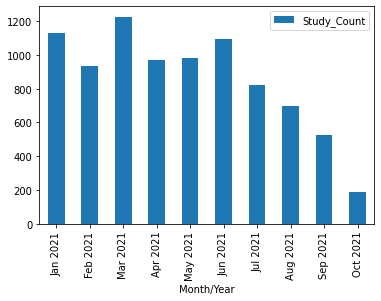

In [0]:
#USING MATPLOTLIB
#IMPORTING MATPLOT INTO PYTHON
import matplotlib.pyplot as plt
stmPD = stmPD.rename(columns={"Month_Year": "Month/Year", "Study_Count": "Study_Count"})

# Plots the data
stmPD.plot(kind='bar', x='Month/Year', y='Study_Count')

# Shows the plot
plt.show()

In [0]:
#IMPORTING MATPLOT INTO PYTHON
import matplotlib.pyplot as plt



#VISUALIZATION OF THE RESULT USING MATPLOTLIB

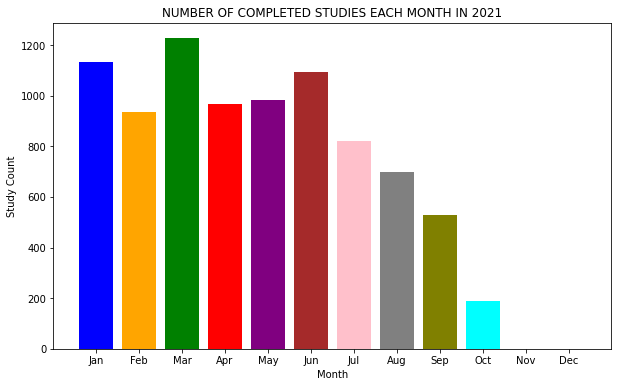

In [0]:
#DEFINING THE DATA NEEDED FOR THE PLOT, SEPARATING THE STRINGS FROM VALUES

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
counts = [1131, 934, 1227, 967, 984, 1094, 819, 700, 528, 187, 0,0]

#defining a color schema
# Define colors
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow']

fig, ax = plt.subplots(figsize=(10, 6)) #adding plot size
plt.bar(months, counts,color = colors)
plt.title('NUMBER OF COMPLETED STUDIES EACH MONTH IN 2021')
plt.xlabel('Month')
plt.ylabel('Study Count')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


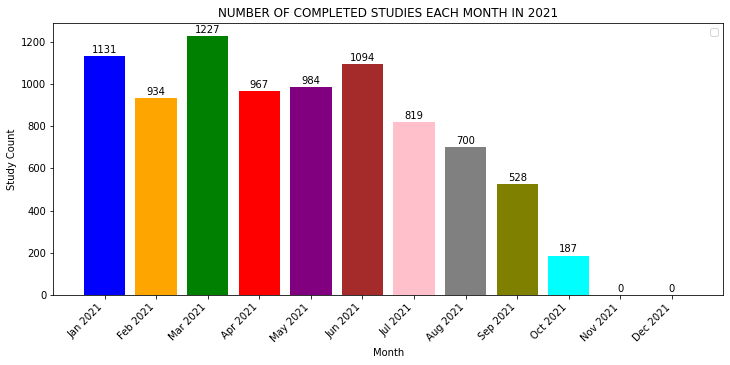

In [0]:
#ANOTHER METHOD 
#DEFINING THE DATA NEEDED FOR THE PLOT, SEPARATING THE STRINGS FROM VALUES
data = [('Jan 2021', 1131), ('Feb 2021', 934), ('Mar 2021', 1227), ('Apr 2021', 967), ('May 2021', 984), ('Jun 2021', 1094), ('Jul 2021', 819), ('Aug 2021', 700), ('Sep 2021', 528), ('Oct 2021', 187), ('Nov 2021', 0), ('Dec 2021', 0)]

# Sorts the data in month order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
data_sorted = sorted(data, key=lambda x: month_order.index(x[0][:3]))

# Extracts the labels and values
labels = [x[0] for x in data_sorted]
values = [x[1] for x in data_sorted]

# Defining colors
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow']

# Creates a bar chart
fig, ax = plt.subplots(figsize=(12,5))
ax.bar(labels, values)
mybar = ax.bar(labels, values,color = colors)

# Sets the title and axis labels
ax.set_title('NUMBER OF COMPLETED STUDIES EACH MONTH IN 2021')
ax.set_xlabel('Month')
ax.set_ylabel('Study Count')
ax.legend()

# Rotates the x-axis labels
plt.xticks(rotation=45, ha='right')

for i, mybar in enumerate(mybar):
    ax.text(mybar.get_x() + mybar.get_width() / 2, mybar.get_height() + 5, values[i], ha='center', va='bottom')

# Displays the chart
plt.show()